### Data Exploration - Joyce 

Included in this .ipynb file are data exploration steps, conducted on the Costco Kaggle dataset.

**Question for our group to consider:** Do we keep or remove `Unnamed: 0`? Code to drop `Unnamed:0` is commented out below. 

In [1]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/Users/JoyceShiah/Downloads/costco_data (1).csv')

## Step 1: Basic dataset exploration

In [4]:
len(dataset)
dataset.head()

,Unnamed: 0,city,state,country,latitude,longitude,locationName,isBusinessWarehouse,Year,Services
0,0,SEATTLE,WA,US,47.565,-122.329,Seattle,False,1983,"Gas, Tires, Food, Hearing, Pharmacy, Optical, ..."
1,1,PORTLAND,OR,US,45.556,-122.521,Portland,False,1983,"Gas, Tires, Food, Hearing, Pharmacy, Optical, ..."
2,2,TUKWILA,WA,US,47.445,-122.251,Tukwila,False,1984,"Gas, Tires, Food, Hearing, Pharmacy, Optical, ..."
3,3,KIRKLAND,WA,US,47.681,-122.183,Kirkland,False,1985,"Gas, Tires, Food, Hearing, Pharmacy, Optical, ..."
4,4,ALOHA,OR,US,45.508,-122.841,Aloha,False,1985,"Gas, Tires, Food, Hearing, Pharmacy, Optical, ..."


In [8]:
dataset.columns

Index(['Unnamed: 0', 'city', 'state', 'country', 'latitude', 'longitude',
       'locationName', 'isBusinessWarehouse', 'Year', 'Services'],
      dtype='object')

In [9]:
dataset.head(1)

,Unnamed: 0,city,state,country,latitude,longitude,locationName,isBusinessWarehouse,Year,Services
0,0,SEATTLE,WA,US,47.565,-122.329,Seattle,False,1983,"Gas, Tires, Food, Hearing, Pharmacy, Optical, ..."


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           543 non-null    int64  
 1   city                 543 non-null    object 
 2   state                543 non-null    object 
 3   country              543 non-null    object 
 4   latitude             543 non-null    float64
 5   longitude            543 non-null    float64
 6   locationName         543 non-null    object 
 7   isBusinessWarehouse  543 non-null    bool   
 8   Year                 543 non-null    int64  
 9   Services             543 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 38.8+ KB


In [11]:
dataset.isnull().sum()

Unnamed: 0             0
city                   0
state                  0
country                0
latitude               0
longitude              0
locationName           0
isBusinessWarehouse    0
Year                   0
Services               0
dtype: int64

In [12]:
dataset.describe()

,Unnamed: 0,latitude,longitude,Year
count,543.000000,543.000000,543.000000,543.000000
mean,354.985267,37.959982,-100.047630,2001.173112
std,215.652600,5.798699,19.558945,10.460409
min,0.000000,19.687000,-159.382000,1976.000000
25%,163.500000,33.909000,-118.145500,1992.000000
50%,364.000000,38.598000,-96.741000,2001.000000
75%,552.500000,41.499500,-82.322500,2010.000000
max,712.000000,64.852000,-70.979000,2020.000000


## Step 2: Data field exploration

### Check for earliest and latest years of Costco establishments recorded in dataset

In [28]:
min_year = dataset['Year'].min()
max_year = dataset['Year'].max()

print(f"Costco dataset's earliest year recorded: {min_year}")
print(f"Costco dataset's latest year recorded: {max_year}")

Costco dataset's earliest year recorded: 1976
Costco dataset's latest year recorded: 2020


### Script to remove `Unnamed:0` from the dataset
- Currently commented out

In [13]:
# dataset = dataset.drop(columns=['Unnamed: 0'])

### Checking for unique values & frequency in dataset's categorical columns: city, state, and country

In [15]:
dataset['city'].value_counts()

city
PHOENIX                6
SAN DIEGO              5
SAN JOSE               4
SOUTH SAN FRANCISCO    3
ATLANTA                3
                      ..
AUBURN HILLS           1
SHELBY TOWNSHIP        1
INDEPENDENCE           1
BLOOMINGDALE           1
EAST LYME              1
Name: count, Length: 476, dtype: int64

In [17]:
dataset['state'].value_counts()

In [18]:
dataset['country'].value_counts()

country
US    543
Name: count, dtype: int64

### Exploring how spread out the Costco warehouses are in the USA (NOT differentiating between Business Warehouse and Non-Bus Warehouse)

In [20]:
# Checking for consistency in latitude and longitude data

dataset[['latitude', 'longitude']].describe()

,latitude,longitude
count,543.000000,543.000000
mean,37.959982,-100.047630
std,5.798699,19.558945
min,19.687000,-159.382000
25%,33.909000,-118.145500
50%,38.598000,-96.741000
75%,41.499500,-82.322500
max,64.852000,-70.979000


### Checking for multiple Costco warehouses per location (NOT differentiating between Business Warehouse and Non-Bus Warehouse)

In [22]:
dataset['locationName'].value_counts()

locationName
Cypress                    2
Columbia                   2
Seattle                    1
Hayward Business Center    1
Phoenix Business Center    1
                          ..
Oak Brook                  1
Schaumburg                 1
Brentwood                  1
Deerfield                  1
E Lyme                     1
Name: count, Length: 541, dtype: int64

### To ensure `isBusinessWarehouse` is boolean

In [24]:
dataset['isBusinessWarehouse'].value_counts()

isBusinessWarehouse
False    525
True      18
Name: count, dtype: int64

### Find frequency of services in Costco, order by DESC order common services in Costco (dataset)
**Next steps:** There are a lot of overlaps in these Service categories, but they all do seem to differ by 1+ servives. 

In [32]:
dataset['Services'].value_counts()

Services
Gas, Tires, Food, Hearing, Pharmacy, Optical, Photo Center, Ship to Warehouse, Warehouse Pickup    282
Gas, Tires, Food, Hearing, Pharmacy, Optical, Ship to Warehouse, Warehouse Pickup                  189
Tires, Food, Hearing, Pharmacy, Optical, Photo Center, Ship to Warehouse, Warehouse Pickup          34
Tires, Food, Hearing, Pharmacy, Optical, Ship to Warehouse, Warehouse Pickup                        10
Gas, Business, Ship to Warehouse                                                                     6
Business, Ship to Warehouse                                                                          5
Food, Business, Ship to Warehouse                                                                    4
Food, Hearing, Pharmacy, Optical, Ship to Warehouse, Warehouse Pickup                                3
Gas, Tires, Food, Pharmacy, Optical, Photo Center, Ship to Warehouse, Warehouse Pickup               2
Gas, Food, Business, Ship to Warehouse                          

## Step 3: Data Preparation & Visualization

In [34]:
# Check for duplicates
dataset.duplicated().sum() 

0

Since there are no duplicates in this Costco dataframe, we do not have to worry about filling in w/ NA's, mean, etc.  
(Ask Laura to confirm if there were no duplicates in JSON file, too)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


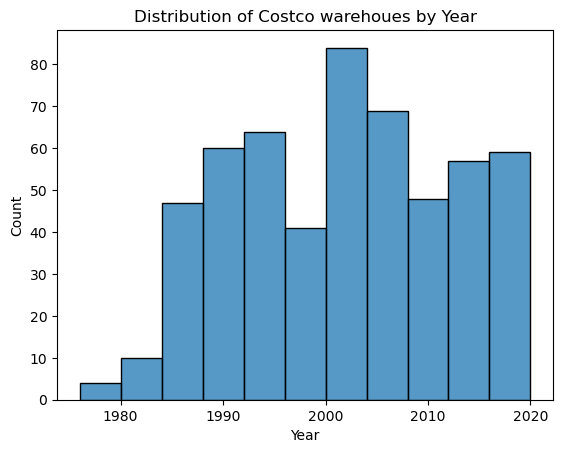

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dataset['Year'])
plt.title('Distribution of Costco warehoues by Year')
plt.show()

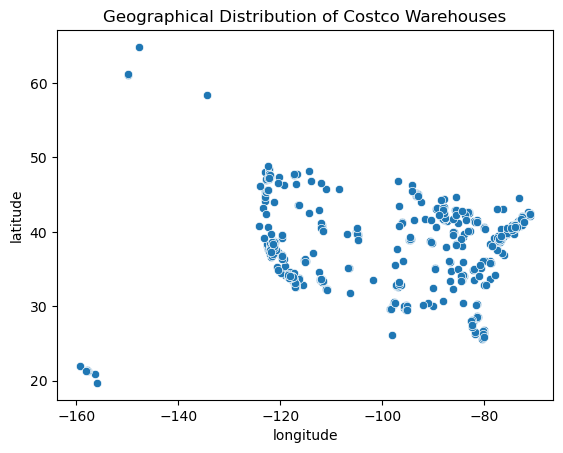

In [40]:
sns.scatterplot(x = 'longitude', y = 'latitude', data = dataset)
plt.title('Geographical Distribution of Costco Warehouses')
plt.show()

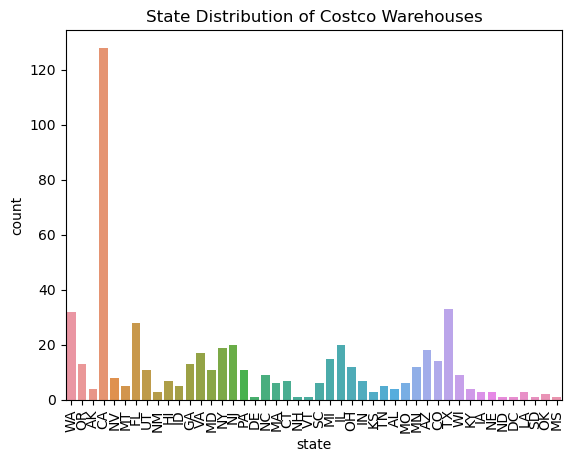

In [43]:
sns.countplot(x = 'state', data = dataset)
plt.title('State Distribution of Costco Warehouses')
plt.xticks(rotation = 90)
plt.show()

### Exploration of year(s) where Costco Business Warehouses started establishing more frequently

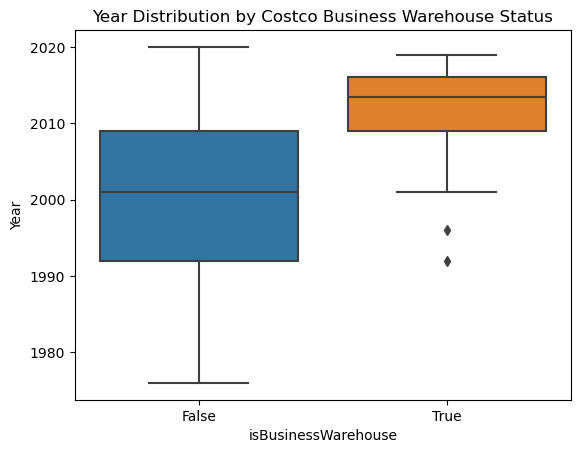

In [52]:
sns.boxplot(x = 'isBusinessWarehouse', y = 'Year', data = dataset)
plt.title('Year Distribution by Costco Business Warehouse Status')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


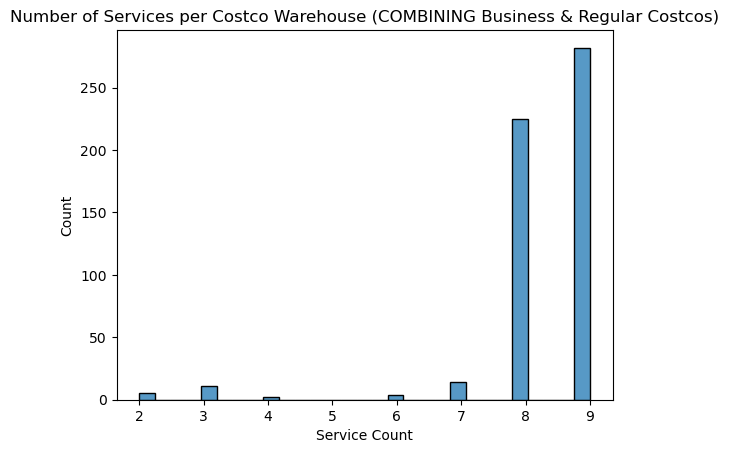

In [54]:
# create column 'Service Count' to store # of individual services listed in `Services` for each Costco recorded 

dataset['Service Count'] = dataset['Services'].apply(lambda x: len(x.split(',')))
sns.histplot(dataset['Service Count'])
plt.title('Number of Services per Costco Warehouse (COMBINING Business & Regular Costcos)')
plt.show()